In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import rc

import matplotlib.mlab as mlab

In [2]:
dfScore1 = pd.read_csv('BrgyScore1.csv', low_memory=False);
dfScore2 = pd.read_csv('BrgyScore2.csv', low_memory=False);
dfScore3A = pd.read_csv('BrgyScore3A.csv', low_memory=False);
dfScore3B = pd.read_csv('BrgyScore3B.csv', low_memory=False);
dfScore4 = pd.read_csv('BrgyScore4.csv', low_memory=False);
dfScore5 = pd.read_csv('BrgyScore5.csv', low_memory=False);

In [3]:
dfMain = dfScore1
# Initiates our main dataframe for the final scoring by copying dfScore1

dfMain = pd.merge(dfMain, dfScore2, on="brgy")
dfMain = pd.merge(dfMain, dfScore3A, on="brgy")
dfMain = pd.merge(dfMain, dfScore3B, on="brgy")
dfMain = pd.merge(dfMain, dfScore4, on="brgy")
dfMain = pd.merge(dfMain, dfScore5, on="brgy")


dfMain.rename(columns={'score':'literacy_score',
                       'finalScore':'home_score',
                       'theScore':'income_score'}, 
              inplace=True)
# Renames the 'score' column into 'literacy_score' to better identify it

dfMain

,brgy,literacy_score,asset_score,water_score,food_score,home_score,income_score
0,1,0.566667,0.367347,1.000000,1.000000,0.892857,1.000000
1,2,0.536019,0.254915,0.036697,1.000000,0.996560,0.995097
2,3,0.416667,0.326531,0.285714,1.000000,0.976190,1.000000
3,4,0.349750,0.331754,0.440758,1.000000,0.992891,0.994135
4,5,0.509877,0.279907,0.089431,1.000000,0.998645,0.979268
5,6,0.487374,0.305394,0.173469,1.000000,0.999150,0.997130
6,7,0.447693,0.253821,0.274419,1.000000,0.872093,0.997384
7,8,0.419841,0.266129,0.185484,1.000000,0.883065,0.982233
8,9,0.775731,0.202116,0.251852,1.000000,0.996914,1.000000
9,10,0.501974,0.274510,0.124183,1.000000,0.868736,0.992708


In [4]:
dfMain['total_score'] = (dfMain['literacy_score'] + dfMain['asset_score'] + dfMain['food_score'] + dfMain['water_score'] + dfMain['home_score'] + dfMain['income_score']) / 6
# Computed for the average of all the scores under the assumption that these have the same weight.

dfMain

,brgy,literacy_score,asset_score,water_score,food_score,home_score,income_score,total_score
0,1,0.566667,0.367347,1.000000,1.000000,0.892857,1.000000,0.804478
1,2,0.536019,0.254915,0.036697,1.000000,0.996560,0.995097,0.636548
2,3,0.416667,0.326531,0.285714,1.000000,0.976190,1.000000,0.667517
3,4,0.349750,0.331754,0.440758,1.000000,0.992891,0.994135,0.684881
4,5,0.509877,0.279907,0.089431,1.000000,0.998645,0.979268,0.642855
5,6,0.487374,0.305394,0.173469,1.000000,0.999150,0.997130,0.660419
6,7,0.447693,0.253821,0.274419,1.000000,0.872093,0.997384,0.640902
7,8,0.419841,0.266129,0.185484,1.000000,0.883065,0.982233,0.622792
8,9,0.775731,0.202116,0.251852,1.000000,0.996914,1.000000,0.704435
9,10,0.501974,0.274510,0.124183,1.000000,0.868736,0.992708,0.627019


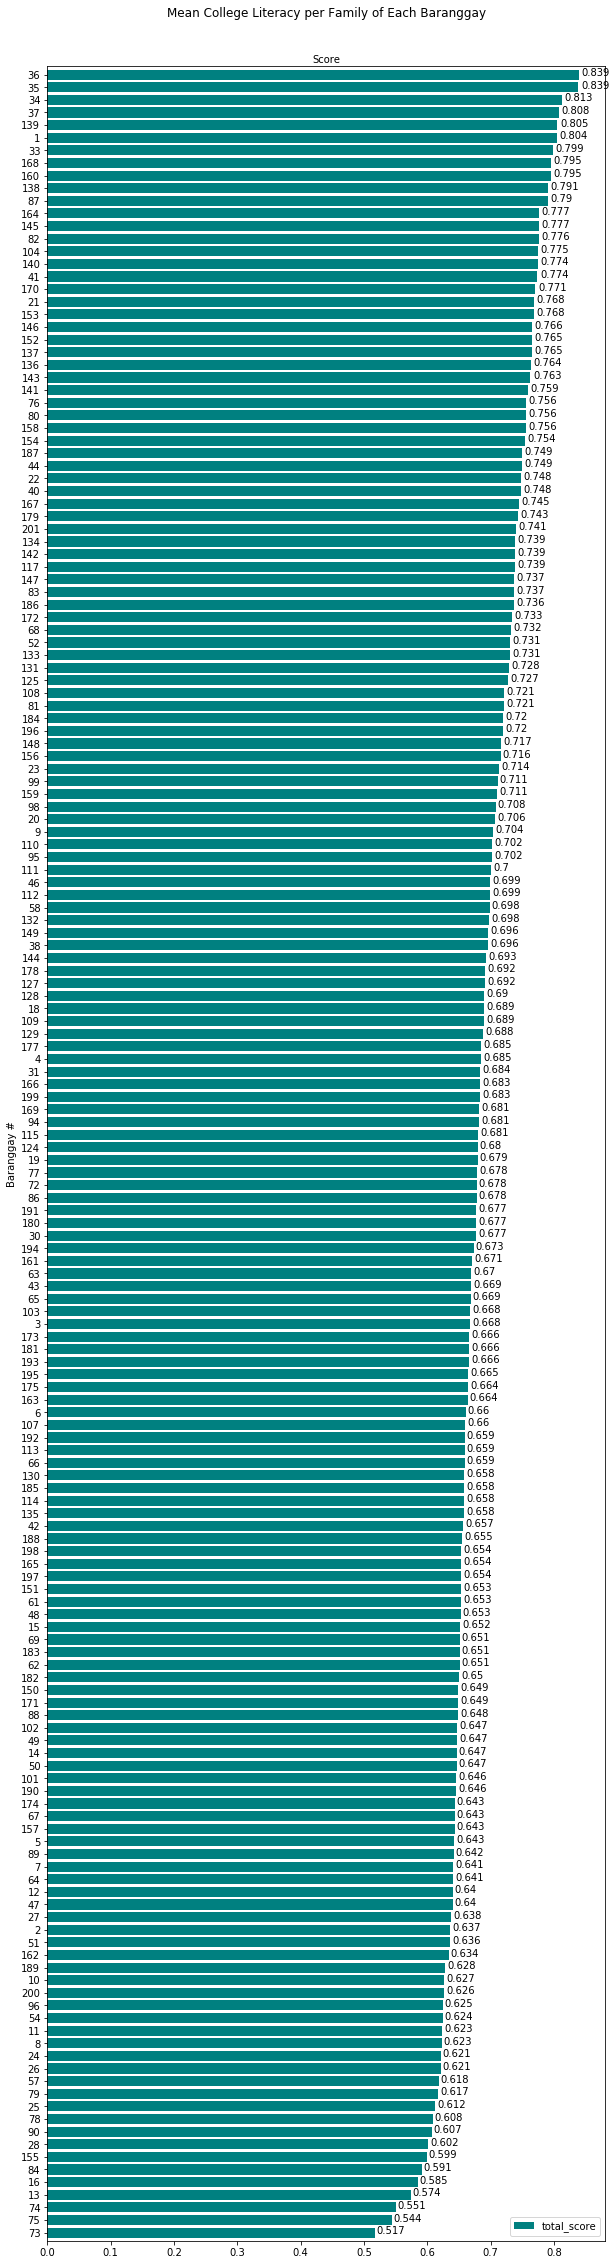

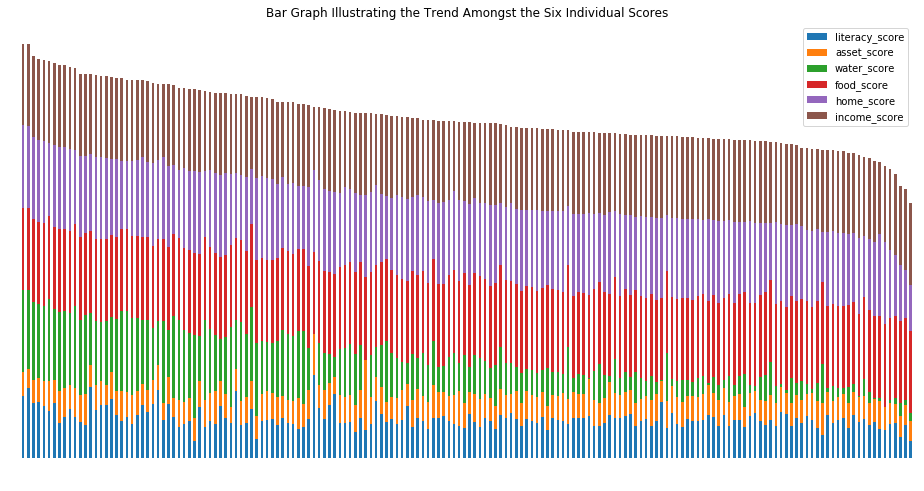

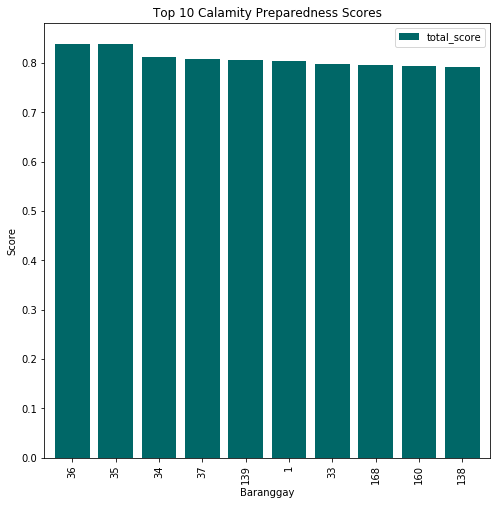

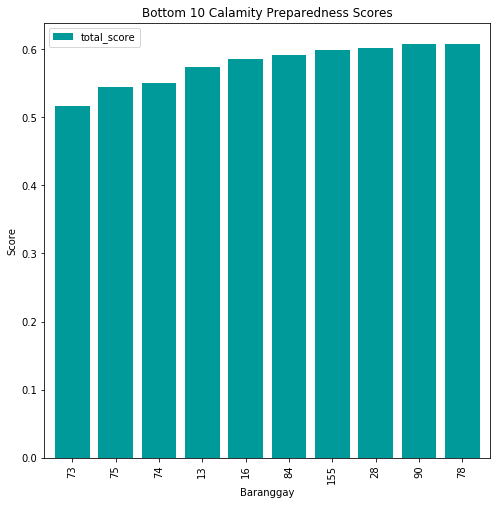

In [36]:
#ax = dfMain.sort_values(by=['total_score']).plot(y='total_score', x='brgy', figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)

arrayBrgyScores = dfMain.groupby('brgy')['total_score'].mean()
# Groups the families by brgy and takes the average of their family literacy.
# Output is an array, not a dataframe.

ax = arrayBrgyScores.sort_values(ascending=False).plot(kind='barh', figsize=(10,40), color='#008080',  width=0.8, stacked=True)
ax.invert_yaxis()
ax.set_ylabel('Baranggay #')
ax.set_xlabel('Score')    
ax.xaxis.set_label_position('top') 
for p in ax.patches:
    ax.annotate(str(round(p.get_width(),3)), (p.get_width() * 1.005, p.get_y() + 0.5))
plot.title('Mean College Literacy per Family of Each Baranggay', y=1.02)
plot.legend()
plot.show()
# Bar graph of all the college literacy rate per family of each baranggay

dfSorted = dfMain.sort_values(by='total_score',ascending=False)
ax = dfSorted.loc[:,['literacy_score','asset_score', 'water_score','food_score','home_score','income_score']].plot.bar(stacked=True, figsize=(16,8))
plot.axis('off')
plot.title('Bar Graph Illustrating the Trend Amongst the Six Individual Scores')
plot.show()

dfMain.nlargest(10, columns=['total_score']).plot(y='total_score', x='brgy', figsize=(8, 8), kind='bar', color='#006767', align='center', width=0.8, stacked=True)
plot.title("Top 10 Calamity Preparedness Scores")
plot.ylabel("Score")
plot.xlabel("Baranggay")

dfMain.nsmallest(10, columns=['total_score']).plot(y='total_score',  x='brgy', figsize=(8, 8), kind='bar',  color='#009a9a',align='center', width=0.8, stacked=True)
plot.title("Bottom 10 Calamity Preparedness Scores")
plot.ylabel("Score")
plot.xlabel("Baranggay")
plot.show()


# Bar graph of the bottom 10 brgys

# Calamity Preparedness Score of Each Baranggay
# Explanation that would tie up all the scores.

In [ ]:
dfMain.to_csv('FinalScore.csv', encoding='utf-8')
# The computed means for each baranggay's family college literates  rate is saved onto a CSV file for future use.

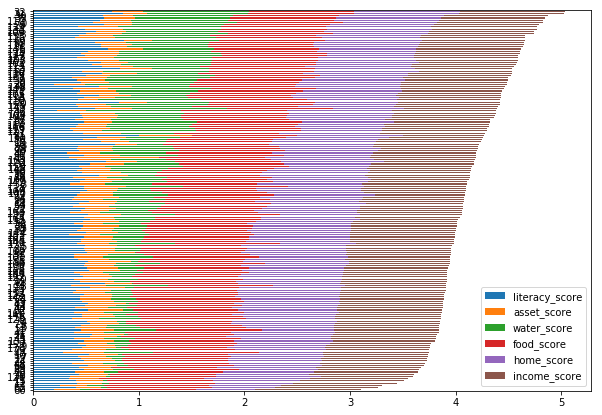

In [11]:

dfSorted = dfMain.sort_values(by='total_score')
dfSorted.loc[:,['literacy_score','asset_score', 'water_score','food_score','home_score','income_score']].plot.barh(stacked=True, figsize=(10,7))
